In [ ]:
# %pip install statsmodels
# %pip install sweetviz
%pip install scikit-learn

In [ ]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sweetviz
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
from collections import Counter
import sklearn
import warnings

%matplotlib inline

%autosave 60
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

In [6]:
df = pd.read_csv('LittleLemonData.csv', parse_dates=['Order Date'])
df.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row Number     21000 non-null  int64         
 1   Order ID       21000 non-null  object        
 2   Order Date     21000 non-null  datetime64[ns]
 3   Delivery Date  21000 non-null  object        
 4   Customer ID    21000 non-null  object        
 5   Customer Name  21000 non-null  object        
 6   City           21000 non-null  object        
 7   Country        21000 non-null  object        
 8   Postal Code    21000 non-null  object        
 9   Country Code   20958 non-null  object        
 10  Cost           21000 non-null  float64       
 11  Sales          21000 non-null  float64       
 12  Quantity       21000 non-null  int64         
 13  Discount       21000 non-null  float64       
 14  Delivery Cost  21000 non-null  float64       
 15  Course Name    2100

In [8]:
df["Profit"] = df["Sales"] - df["Cost"]
df.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00


In [9]:
df.to_csv("modified.csv", index=False)

In [10]:
df.describe()

,Row Number,Order Date,Cost,Sales,Quantity,Discount,Delivery Cost,Profit
count,21000.00,21000,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00
mean,10500.50,2021-03-25 19:27:50.400000,147.04,220.56,2.12,49.16,50.98,73.52
min,1.00,2019-06-14 00:00:00,44.57,66.86,1.00,9.12,1.11,22.29
25%,5250.75,2020-06-03 00:00:00,91.84,137.76,1.75,20.00,26.64,45.92
50%,10500.50,2021-03-19 12:00:00,125.00,187.50,2.00,47.84,51.11,62.50
75%,15750.25,2022-01-26 06:00:00,210.00,315.00,3.00,80.34,76.12,105.00
max,21000.00,2023-01-06 00:00:00,320.00,480.00,3.00,99.24,99.91,160.00
std,6062.32,NaN,76.57,114.85,0.78,31.53,28.45,38.28


In [11]:
df.columns

Index(['Row Number', 'Order ID', 'Order Date', 'Delivery Date', 'Customer ID', 'Customer Name', 'City', 'Country', 'Postal Code', 'Country Code', 'Cost', 'Sales', 'Quantity', 'Discount', 'Delivery Cost', 'Course Name', 'Cuisine Name', 'Starter Name', 'Desert Name', 'Drink', 'Sides', 'Profit'], dtype='object')

In [13]:
df2 = df[df["Sales"] >= 70.00]
df2

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,16721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,649-7309,CO,320.00,480.00,2,98.01,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,160.00
20996,17721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,1141350020,CO,93.13,139.69,2,73.09,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,46.56
20997,18721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,987-1453,CO,75.00,112.50,2,97.48,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,37.50
20998,19721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,993-1191,CO,144.09,216.13,2,51.05,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,72.04


In [14]:
df2.groupby(["Customer Name"])["Sales"].sum()

Customer Name
Aaron Cromley       4527.56
Abigail Struis      4323.54
Adah Adamczewski    4812.30
Adaline Reichartz   4301.04
Adamo Rumens        4812.30
                      ...  
Zita Coldbath       4631.37
Zolly Heinzel       4466.61
Zora Hanalan        4728.87
Zorana Diggin       4453.78
Zorine Delacourt    4453.78
Name: Sales, Length: 1000, dtype: float64

In [15]:
task1 = pd.DataFrame(df2.groupby(["Customer Name"])["Sales"].sum())
task1

,Sales
Customer Name,
Aaron Cromley,4527.56
Abigail Struis,4323.54
Adah Adamczewski,4812.30
Adaline Reichartz,4301.04
Adamo Rumens,4812.30
...,...
Zita Coldbath,4631.37
Zolly Heinzel,4466.61
Zora Hanalan,4728.87


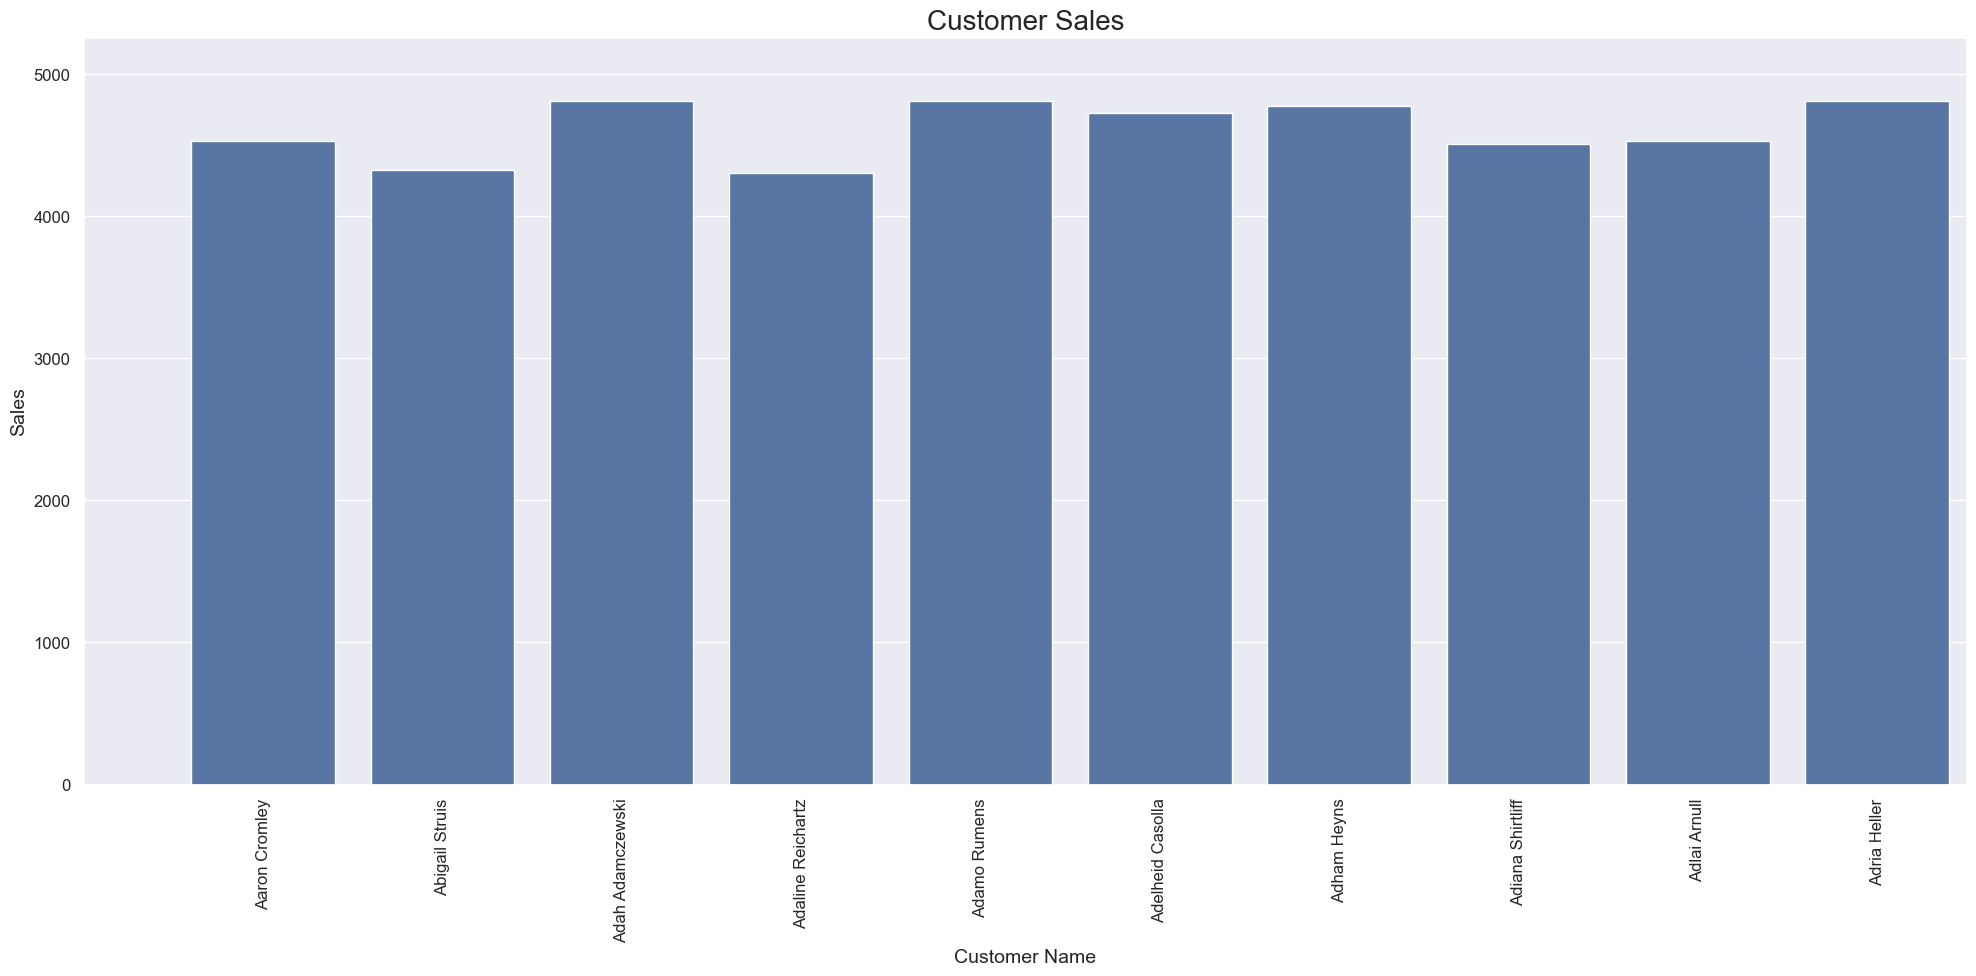

In [16]:
# Sort Barplots by Values and Single Plot

fig = plt.figure(figsize=(20,10))

sns.barplot(x=task1.index, y=task1.Sales, data=task1)
plt.title("Customer Sales", size=20)
plt.xlabel("Customer Name")
#plt.ylabel("Average Ticket Prices")
plt.xticks(rotation=90)
#plt.ticklabel_format(style='plain', axis='y')
plt.xlim(-1, 9.5)
plt.tight_layout()
plt.show()

In [17]:
df3 = df[df["Order Date"] < "2023-01-01"]
df3.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00


In [18]:
df3["Order Date"].min()

Timestamp('2019-06-14 00:00:00')

In [19]:
df3["Order Date"].max()

Timestamp('2022-12-31 00:00:00')

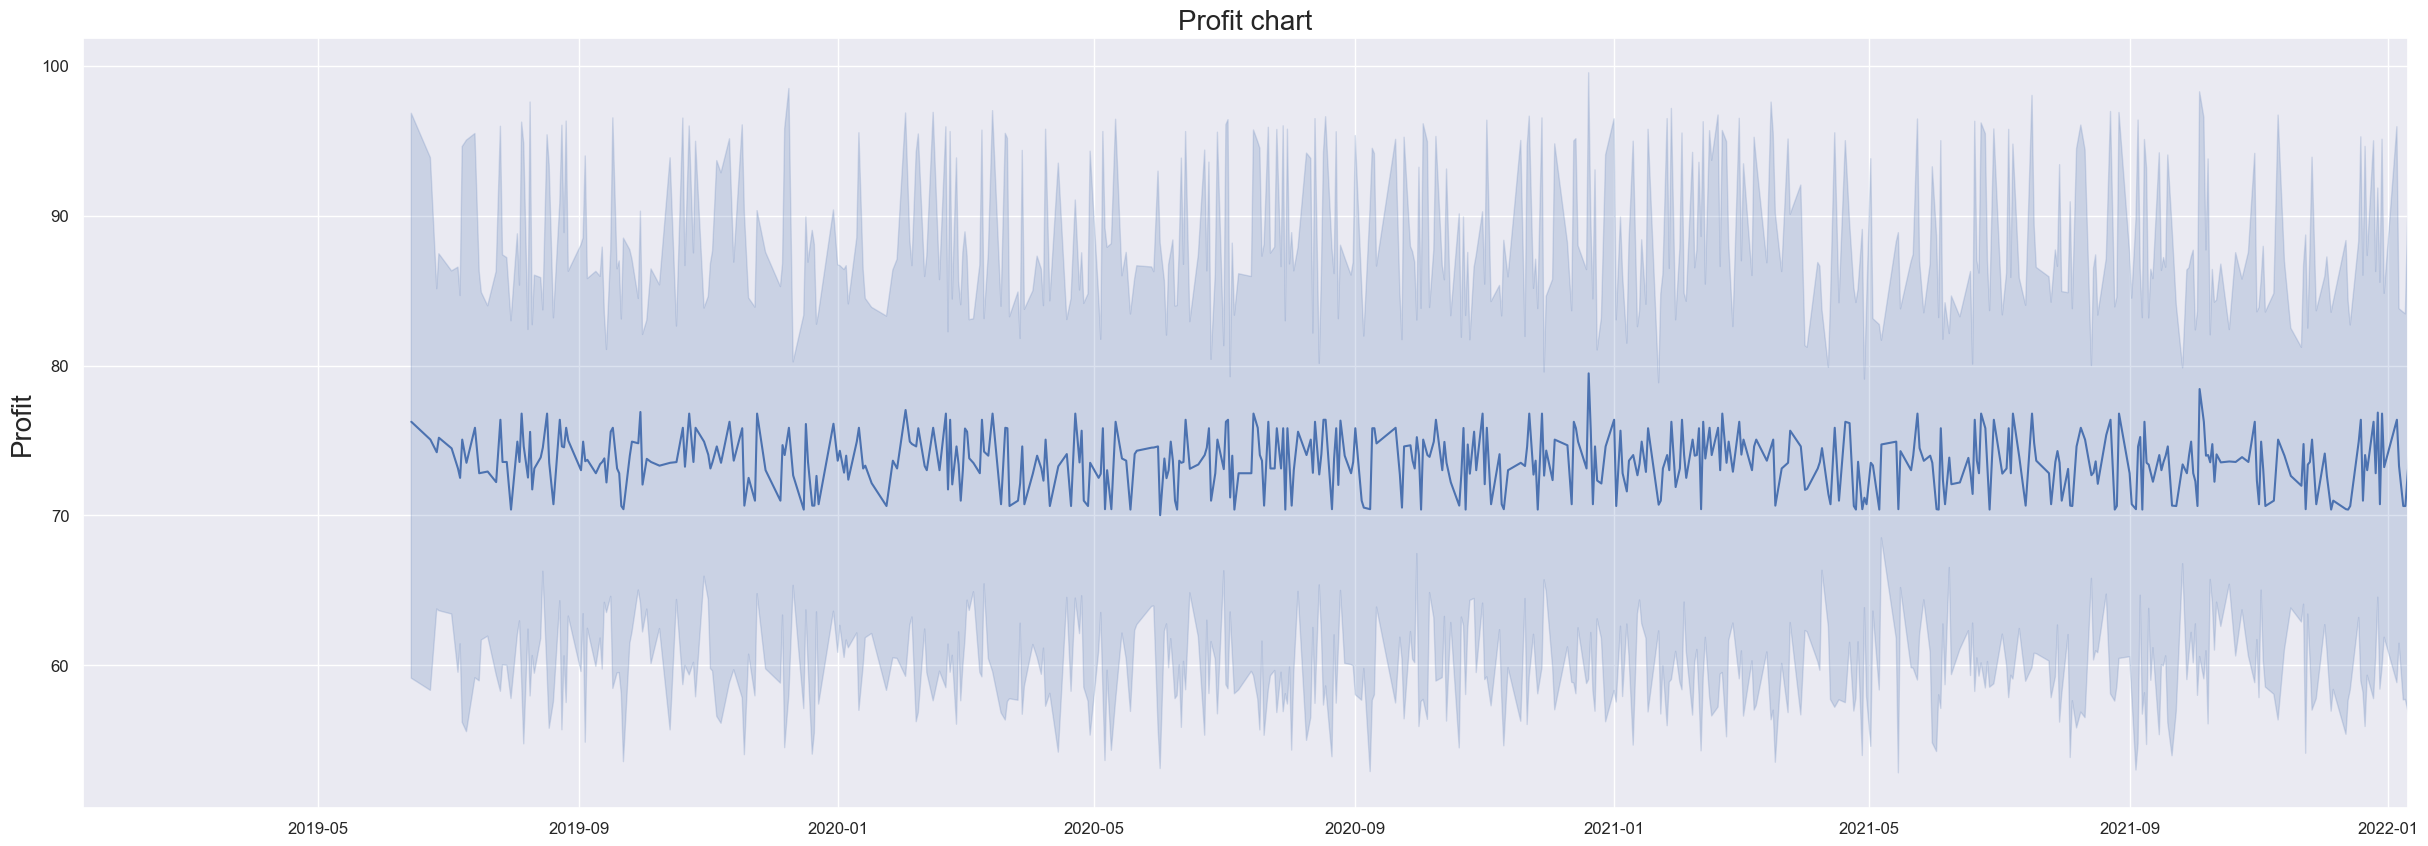

In [20]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df3["Order Date"], y=df3.Profit, data=df3, estimator='mean')
plt.title("Profit chart", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("Profit", fontsize=20)
plt.xlim('2019-01-10', '2022-01-10')
#plt.legend(['',''])
plt.show()

In [ ]:
df.groupby(["Customer Name"])["Sales","Profit"].sum()

In [ ]:
df4 = pd.DataFrame(df.groupby(["Customer Name"])["Sales","Profit"].sum())
df4

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=df4.index, y=df4.Sales, size='Profit', data=df4, legend=False, sizes=(20,2000))
plt.title("Sales Bubble Chart", fontsize=20)
#plt.xlabel("Flight Number",fontsize=20)
#plt.ylabel("Launch Site",fontsize=20)
plt.xlim(-0.5, 20.5)
plt.xticks(rotation = 90)
plt.show()

In [31]:
df3.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00


In [ ]:
df3.groupby("Cuisine Name").sum()

In [33]:
df3["Year"] = df3["Order Date"].dt.year

In [34]:
df3.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit,Year
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13,2019
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69,2019
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00,2019
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04,2019
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00,2019


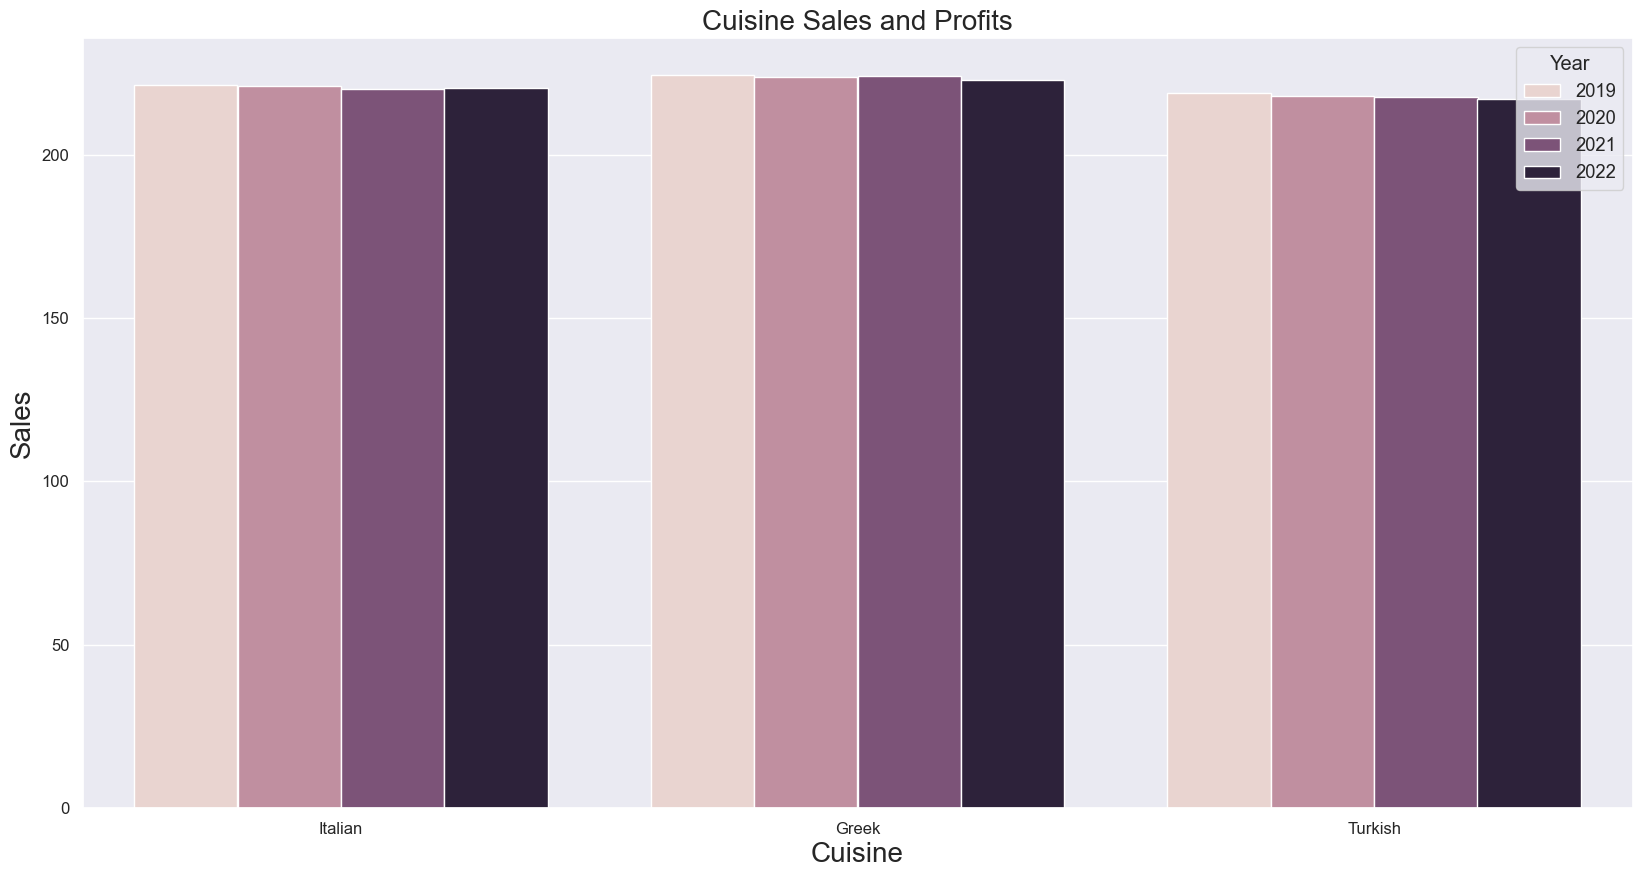

In [35]:
plt.figure(figsize=(20,10))


sns.barplot(y="Sales", x="Cuisine Name", hue="Year", data=df3, ci=None)
plt.xlabel("Cuisine",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.title("Cuisine Sales and Profits", fontsize=20)

plt.show()

In [ ]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(20,20))
#fig.suptitle('Main Title')


sns.barplot(x="Cuisine Name", y="Sales", data=df3, ci=None, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Cuisine Name")
ax[0].set_ylabel("Sales")

sns.scatterplot(x=df4.index, y=df4.Sales, size='Profit', data=df4, legend=False, sizes=(20,2000), ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Customer Name")
ax[1].set_ylabel("Sales")
ax[1].set_xlim(-0.5, 20.5)

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()